## Data Cleaning/Wrangling

The goal of this section is to understand the data structure, meaning, at its raw format and start combining them into a dataframe that will be used for exploratory analysis later. Also spot check if there are missing data and determine of those records need to be update/eliminate.

Import needed libraries

In [1]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

C:\Users\sit_k\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read off raw data files into different panda dataframe

In [2]:
categories = pd.read_csv('./data/item_categories.csv')
items = pd.read_csv('./data/items.csv')
shop = pd.read_csv('data/shops.csv')
train_sales = pd.read_csv('data/sales_train.csv')

Examine each dataframe one by one

In [3]:
display(categories.head())
print(categories.shape)
print(categories.info())

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


(84, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None


In [4]:
categories_mod = categories.set_index('item_category_id')

In [5]:
# check if there are duplicated category_id. Both would return the same number of records as the original if none
print(len(categories))
print(np.sum(categories.item_category_name.value_counts() == 1))

84
84


In [6]:
display(items.head())
print(items.shape)
print(items.info())

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


(22170, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None


In [7]:
items_mod = items.set_index('item_id')

In [8]:
print(len(items_mod))
print(np.sum(items_mod.item_name.value_counts() == 1))

22170
22170


In [9]:
display(shop.head())
print(shop.shape)
print(shop.info())

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


(60, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [10]:
shop_mod = shop.set_index('shop_id')

In [11]:
print(len(shop_mod))
print(np.sum(shop_mod.shop_name.value_counts() == 1))

60
60


In [12]:
display(train_sales.head())
display(train_sales.describe())
print(train_sales.info())
print(train_sales.shape)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
(2935849, 6)


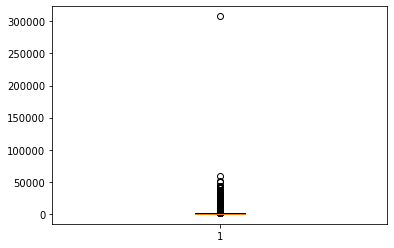

In [13]:
# check price distribution to identify outliers
plt.boxplot(train_sales.item_price)
plt.show()

In [14]:
# see that there is a major outlier on price. Also, we find some negative value on item prices which we should look into
train_sales[train_sales.item_price >= 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [15]:
# how many transaction that involve item id 6066
train_sales[train_sales.item_id == 6066]
# only 1, we will treat this record as outlier and will drop that from the dataset

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [16]:
# any transaction has negadive item price
train_sales[train_sales.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


There is only one record that has negative sales. We will replace that with the same item that was sold in the same month but from different day/shop

In [17]:
train_sales[(train_sales.item_id == 2973) & (train_sales.date_block_num == 4)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
442065,04.05.2013,4,28,2973,2499.0,1.0
442083,24.05.2013,4,28,2973,1249.5,1.0
442084,16.05.2013,4,28,2973,1249.0,1.0
445020,05.05.2013,4,27,2973,2499.0,1.0
445021,20.05.2013,4,27,2973,1249.0,1.0
...,...,...,...,...,...,...
528018,19.05.2013,4,7,2973,1249.0,1.0
528897,18.05.2013,4,5,2973,1249.5,1.0
529456,23.05.2013,4,50,2973,1249.0,1.0
531332,08.05.2013,4,6,2973,2499.0,1.0


It appears that ther price has a price drop in the middle of May 2013, from 2499 to 1249. Given the negative sale record happened in mid month, we assume the new pricing already took place

In [18]:
train_sales.loc[train_sales.item_price < 0, 'item_price'] = 1249

In [19]:
# filter out the 6066 item id record by restricting the max item price
train_sales = train_sales.query('item_price < 10000')

In [20]:
# check for missing value
np.sum(train_sales.isnull())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

The data sources do not have missing value, the only issue is that the date column within train_sales is treated as string. We will convert that into datetime
Also, there are item count and price per unit, but do not have sales. We will create a new column 'sales' by multiply item_counts with item_price. 'sales' will be the study target variable.

In [21]:
train_sales['date'] = pd.to_datetime(train_sales['date'], format='%d.%m.%Y')

In [22]:
train_sales['sales'] = train_sales['item_price'] * train_sales['item_cnt_day']

In [23]:
train_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916104 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
 6   sales           float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 178.0 MB


Using train_sale as the main dataframe, obtain item_name, shop_name, and item_category_name through merging with other dataframes. Perform merge three times

In [24]:
df1 = train_sales.merge(shop, on='shop_id')
df2 = df1.merge(items, on='item_id')
df3 = df2.merge(categories, on='item_category_id')

In [25]:
# check to ensure all columns exist
df3.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales,shop_name,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,999.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-02,0,25,22154,999.0,1.0,999.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-03,0,25,22154,999.0,1.0,999.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,999.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,999.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [26]:
# rearrange columns order
df = df3[['date', 'date_block_num', 'shop_id', 'shop_name', 'item_id', 'item_name',
          'item_category_id', 'item_category_name', 'item_price', 'item_cnt_day', 'sales']]

In [27]:
# final view of the completed dataframe
df.head()

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day,sales
0,2013-01-02,0,59,"Ярославль ТЦ ""Альтаир""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0,1.0,999.0
1,2013-01-02,0,25,"Москва ТРК ""Атриум""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0,1.0,999.0
2,2013-01-03,0,25,"Москва ТРК ""Атриум""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0,1.0,999.0
3,2013-01-20,0,25,"Москва ТРК ""Атриум""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0,1.0,999.0
4,2013-01-23,0,25,"Москва ТРК ""Атриум""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.0,1.0,999.0


Write out the final dataframe into a separate csv file for ease of access in exploratory analysis

In [28]:
df.to_csv('data/train_df.csv', index=False)